# Module 4 : Performance measurements of Random Forest and Support Vector Machines

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore")  

In [3]:
df=p.read_excel("AirQuality.xlsx")

In [4]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Country','State','city','place','lastupdate','Avg','Max','Min','Pollutants']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)

In [5]:
df['AQI'] = df.Avg.map({ '68':'satisfactor', '74':'satisfactor', '71':'satisfactor', '4':'good', '39':'good', '42':'good', '27':'good', '263':'poor', '250':'poor', '249':'poor','258':'poor', '284':'poor', '28':'good', '106':'satisfactor', '44':'good', '62':'satisfactor', '59':'satisfactor', '1':'good', '9':'good', '15':'good', '34':'good','63':'satisfactor', '14':'good', '13':'good', '69':'satisfactor', '37':'good', '2':'good', '5':'good', '66':'satisfactor', '202':'poor', '11':'good', '10':'good','52':'satisfactor', '54':'satisfactor', '246':'poor', '248':'poor', '32':'good', '93':'satisfactor', '226':'poor', '189':'moderate', '124':'moderate', '272':'poor','277':'poor', '278':'poor', '279':'poor', '280':'poor', '87':'satisfactor', '19':'good', '240':'poor', '197':'moderate', '38':'good', '84':'satisfactor','61':'satisfactor', '196':'moderate', '171':'moderate', '23' :'good', '111':'moderate', '43' :'good', '188':'moderate', '203' :'poor' , '16' :'good', '20' :'good','225' :'poor' , '190':'moderate', '26' :'good', '104':'moderate', '25' :'good', '224' :'poor' , '210' :'poor' , '83':'satisfactor', '82':'satisfactor', '233' :'poor' ,'205' :'poor' , '78':'satisfactor', '70':'satisfactor', '211' :'poor' , '179':'moderate', '91':'satisfactor', '49':'good', '134':'moderate', '161':'moderate', '223' :'poor' ,'57':'satisfactor', '73':'satisfactor', '207' :'poor' , '184':'moderate', '48' :'good', '6' :'good', '7' :'good', '194':'moderate', '21' :'good', '50' :'good', '231' :'poor' ,'175':'moderate', '45' :'good', '86':'satisfactor', '243' :'poor' , '232' :'poor' , '18' :'good', '31' :'good', '95':'satisfactor', '237' :'poor' , '217' :'poor' ,'99':'satisfactor', '33' :'good', '176':'moderate', '22' :'good', '29' :'good', '107':'moderate', '17' :'good', '75':'satisfactor', '220' :'poor' , '165':'moderate','149':'moderate', '3' :'good', '245' :'poor' , '239' :'poor' , '72':'satisfactor', '77':'satisfactor', '208' :'poor' , '24' :'good', '198':'moderate', '153':'moderate','53':'satisfactor', '228' :'poor' , '186':'moderate', '51':'satisfactor', '247' :'poor' , '219' :'poor' , '100':'satisfactor', '36' :'good', '204' :'poor' , '30' :'good','221' :'poor' , '229' :'poor' , '187':'moderate', '56':'satisfactor', '230' :'poor' , '192':'moderate', '114':'moderate', '274' :'poor' , '236' :'poor' ,'222' :'poor' , '206' :'poor' , '174':'moderate', '58':'satisfactor', '235' :'poor' , '212' :'poor' , '120':'moderate', '148':'moderate', '242' :'poor' ,'215' :'poor' , '80':'satisfactor', '79':'satisfactor', '67':'satisfactor', '40' :'good', '35' :'good', '185':'moderate', '101':'moderate', '46' :'good', '209' :'poor' ,'169':'moderate', '12' :'good', '47' :'good', '227' :'poor' , '200' :'moderate' , '244' :'poor' , '238' :'poor' , '160':'moderate', '282' :'poor' , '218' :'poor' ,'261' :'poor' , '262' :'poor' , '260' :'poor' , '256' :'poor' , '252' :'poor' , '162':'moderate', '172':'moderate', '156':'moderate', '133':'moderate','116':'moderate', '193':'moderate', '123':'moderate', '65':'satisfactor', '96':'satisfactor', '173':'moderate', '103':'moderate', '8' :'good', '273' :'poor' , '275' :'poor' ,'283' :'poor' , '276' :'poor' , '254' :'poor' , '152':'moderate', '105':'moderate', '64':'satisfactor', '0' :'good', '76':'satisfactor', '127':'moderate', '97':'satisfactor','115':'moderate', '150':'moderate', '142':'moderate', '41' :'good', '102':'moderate', '90':'satisfactor', '132':'moderate', '98':'satisfactor', '199':'moderate', '191':'moderate','157':'moderate', '139':'moderate', '94':'satisfactor', '110':'moderate', '270' :'poor' , '268' :'poor' , '281' :'poor' , '265' :'poor' , '267' :'poor' ,'269' :'poor' , '81':'satisfactor', '128':'moderate', '146':'moderate', '145':'moderate', '129':'moderate', '85':'satisfactor', '117':'moderate', '108':'moderate', '154':'moderate','131':'moderate', '255' :'poor' , '257' :'poor' , '88':'satisfactor', '113':'moderate', '118':'moderate', '167':'moderate', '164':'moderate', '137':'moderate','135':'moderate', '138':'moderate', '109':'moderate', '60':'satisfactor', '177':'moderate', '271' :'poor' , '170':'moderate', '144':'moderate', '166':'moderate','155':'moderate', '136':'moderate', '151':'moderate', '89':'satisfactor', '119':'moderate', '266' :'poor' , '264' :'poor' , '251' :'poor' , '253' :'poor' ,'259' :'poor' , '163':'moderate', '159':'moderate', '241' :'poor' , '214' :'poor' , '122':'moderate', '234' :'poor' , '195':'moderate', '130':'moderate','216' :'poor' , '213' :'poor' , '121':'moderate', '112':'moderate', '168':'moderate', '201' :'poor' , '141':'moderate', '181':'moderate', '143':'moderate','126':'moderate', '182':'moderate', '178':'moderate', '158':'moderate', '140':'moderate', '183':'moderate', '92':'satisfactor', '180':'moderate', '147':'moderate', '55':'satisfactor','125':'moderate'})

In [6]:
df['class'] = df.AQI.map({'good':1,'moderate':0, 'servere':0, 'verypoor':0, 'satisfactor':1,'poor':0})

In [7]:
del df['AQI']

In [8]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [9]:
X = df.drop(labels='class', axis=1)
#Response variable
y = df.loc[:,'class']    

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Random Forest:

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

predictR = rfc.predict(X_test)

print("")
print('Classification report of Random Forest Results:')
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(rfc, X, y, cv=50)
print('Cross validation test results of accuracy:')
print(accuracy)
print("")

#get the mean of each fold 
print("")
print("Accuracy result of Random Forest is:",accuracy.mean() * 100)
print("")

cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")



Classification report of Random Forest Results:

             precision    recall  f1-score   support

          0       0.99      1.00      0.99        73
          1       1.00      0.99      1.00       175

avg / total       1.00      1.00      1.00       248

Cross validation test results of accuracy:
[0.94117647 1.         1.         1.         1.         0.94117647
 1.         1.         1.         1.         1.         1.
 0.94117647 1.         1.         1.         1.         0.94117647
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.94117647 1.         0.94117647
 1.         1.         1.         1.         0.9375     1.
 0.875      1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


Accuracy result of Random Forest is: 98.91911764705883

Confusion Matrix result of Random Forest is:
 [[ 73   0]
 [  1 174]]

Sensitivity :  1.0

Specificity :  0.9942857

In [12]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 174
True Negative : 73
False Positive : 0
False Negative : 1

True Positive Rate : 0.9942857142857143
True Negative Rate : 1.0
False Positive Rate : 0.0
False Negative Rate : 0.005714285714285714

Positive Predictive Value : 1.0
Negative predictive value : 0.9864864864864865


Support Vector Machines:

In [13]:
from sklearn.svm import SVC
s = SVC()

s.fit(X_train,y_train)

predicts = s.predict(X_test)

print("")
print('Classification report of Support Vector Machines Results:')
print("")

print(classification_report(y_test,predicts))



accuracy = cross_val_score(s, X, y, cv=50)
print('Cross validation test results of accuracy:')
print(accuracy)
print("")
#get the mean of each fold 
print("")
print("Accuracy result of Support Vector Machines is:",accuracy.mean() * 100)
print("")

cm1=confusion_matrix(y_test,predicts)
print('Confusion Matrix result of Support Vector Machines is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")



Classification report of Support Vector Machines Results:

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        73
          1       0.71      1.00      0.83       175

avg / total       0.50      0.71      0.58       248

Cross validation test results of accuracy:
[0.70588235 0.70588235 0.70588235 0.70588235 0.70588235 0.70588235
 0.70588235 0.70588235 0.70588235 0.70588235 0.70588235 0.70588235
 0.70588235 0.70588235 0.70588235 0.70588235 0.70588235 0.70588235
 0.70588235 0.70588235 0.70588235 0.70588235 0.70588235 0.70588235
 0.70588235 0.70588235 0.70588235 0.70588235 0.70588235 0.70588235
 0.70588235 0.70588235 0.6875     0.6875     0.6875     0.6875
 0.6875     0.6875     0.6875     0.6875     0.6875     0.6875
 0.73333333 0.73333333 0.73333333 0.73333333 0.73333333 0.73333333
 0.73333333 0.73333333]


Accuracy result of Support Vector Machines is: 70.65980392156862

Confusion Matrix result of Support Vector Machines is:
 [[  0 

In [14]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 175
True Negative : 0
False Positive : 73
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.0
False Positive Rate : 1.0
False Negative Rate : 0.0

Positive Predictive Value : 0.7056451612903226
Negative predictive value : nan


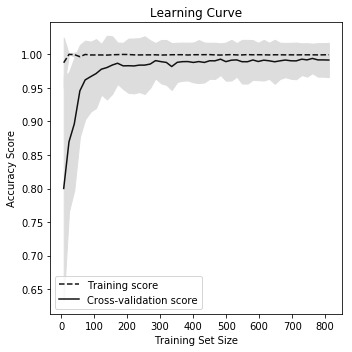

In [15]:
# Random forest

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                               X, y, cv=70, scoring='accuracy', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=n.linspace(0.01, 1.0, 50))

train_mean = n.mean(train_scores, axis=1)
train_std = n.std(train_scores, axis=1)

test_mean = n.mean(test_scores, axis=1)
test_std = n.std(test_scores, axis=1)

# Naive bayes
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    
    # Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

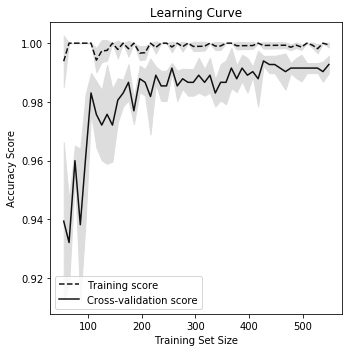

In [16]:
# SVC


import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                               X, y, cv=None, scoring='accuracy', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=n.linspace(0.1, 1.0, 50))

train_mean = n.mean(train_scores, axis=1)
train_std = n.std(train_scores, axis=1)

test_mean = n.mean(test_scores, axis=1)
test_std = n.std(test_scores, axis=1)

# Naive bayes
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    
    # Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()